# Hierarchical clustering
Nel seguente notebook si applica hierarchical clustering ai dati che abbiamo

In [3]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/_temp_CS-dataset.csv",sep='\t')
df.head()


,CustomerID,I,Iu,Imax,E
0,17850.0,1693,24,12.0,4.380532
1,13047.0,1355,106,32.0,6.481921
2,12583.0,5009,115,360.0,6.445631
3,13748.0,439,24,80.0,4.494680
4,15100.0,58,1,32.0,0.000000


## Transformation

In [4]:
#Eliminiamo il client id null per adesso poi non ci sarà
df=df[df["CustomerID"].notnull()]
del df['CustomerID']
df.head()

,I,Iu,Imax,E
0,1693,24,12.0,4.380532
1,1355,106,32.0,6.481921
2,5009,115,360.0,6.445631
3,439,24,80.0,4.494680
4,58,1,32.0,0.000000


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:5])

[[0.01013085 0.01282766 0.00192263 0.42281532]
 [0.0084153  0.05856107 0.00216912 0.62564451]
 [0.02696146 0.06358059 0.00621156 0.6221417 ]
 [0.00376608 0.01282766 0.00276069 0.43383311]
 [0.00183228 0.         0.00216912 0.        ]]


## Clustering
I parametri da variare sono method e metric. Truncate ci permette di non visualizzare tutti i dati, ma solo un sottoinsieme
### Complete

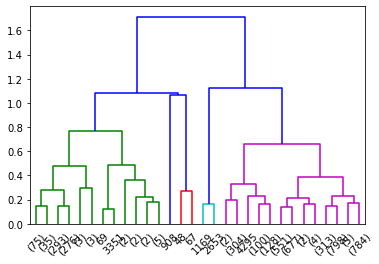

In [11]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.8, truncate_mode='lastp')

### Single


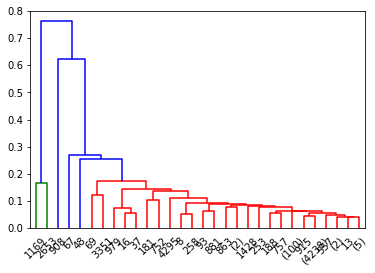

In [8]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

### Average

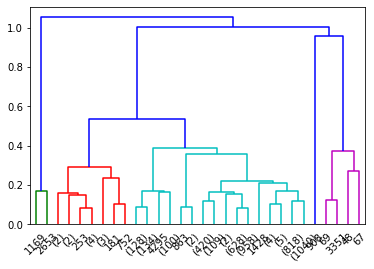

In [9]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')